In [2]:
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
data = pd.read_csv("C:/Users/Seung kyu Hong/Desktop/data.csv")

In [14]:
data.head()

,Date,Daily_Confirmed,traveled,Domestic_Air_Seoul_In,trendTotal,meanTemperature,dailyTemperatureRange,rolling_3,Policy_1,Policy_3
0,2020.3.1,6,0,216,58.14908,5.8,6.9,8.666667,0,1
1,2020.3.2,6,0,216,73.62835,3.4,7.6,6.333333,0,1
2,2020.3.3,1,0,215,61.54096,4.8,10.2,5.666667,0,1
3,2020.3.4,5,1,215,55.16472,2.2,5.9,4.333333,0,1
4,2020.3.5,1,0,215,51.35339,1.4,9.1,4.000000,0,1


In [21]:
from sklearn.linear_model import ElasticNet

e = ElasticNet(alpha=0.1)

In [22]:
x = data.drop(['Date','Daily_Confirmed'],axis=1)
y = data['Daily_Confirmed']
trainx = x[:214]
trainy = y[:214]
testx=x[214:]
texty = y[214:]

In [23]:
e.fit(trainx,trainy)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [24]:
(texty-e.predict(testx)).mean()

3.144819489721919

In [26]:
temp = e.predict(testx)

In [16]:
tTestResult

Ttest_1sampResult(statistic=-0.32489314482696435, pvalue=0.7488120517054563)

In [17]:
print('t검정 통계량 = %.3f, pvalue = %.3f'%(tTestResult))

t검정 통계량 = -0.325, pvalue = 0.749


In [4]:
alone = data[data['커플']=='없다']['총여가시간']

In [5]:
couple = data[data['커플']=='있다']['총여가시간']

In [6]:
tTestResult = stats.ttest_ind(couple,alone)

In [7]:
print('t검정 통계량 = %.3f, pvalue = %.3f'%(tTestResult))

t검정 통계량 = 1.184, pvalue = 0.244


In [25]:
data['주중'].mean()

1.375

In [26]:
data['주말'].mean()

2.75

In [8]:
tTestResult = stats.ttest_ind(data['주중'],data['주말'])

In [9]:
print('t검정 통계량 = %.3f, pvalue = %.3f'%(tTestResult))

t검정 통계량 = -7.540, pvalue = 0.000


In [29]:
women = data[data['성별']=="여자"]['총여가시간']

In [33]:
tTestResult = stats.ttest_ind(men, women)

In [34]:
tTestResult

Ttest_indResult(statistic=-0.22691521523500507, pvalue=0.8217060065246546)

In [35]:
print('t검정 통계량 = %.3f, pvalue = %.3f'%(tTestResult))

t검정 통계량 = -0.227, pvalue = 0.822


In [46]:
tTestResult = stats.ttest_rel(data['주중'],data['주말'])

In [48]:
print('t검정 통계량 = %.3f, pvalue = %.3f'%(tTestResult))

t검정 통계량 = -9.401, pvalue = 0.000


In [52]:
tTestResult.count(4)

0

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


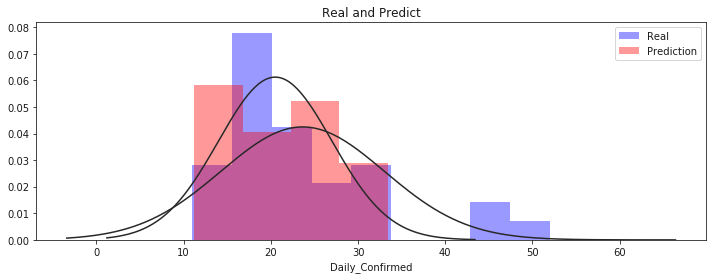

In [87]:
fig = plt.figure(figsize=(12,4))
sns.set_color_codes()
sns.distplot(texty,kde=False,color='blue',label="Real",fit=stats.norm)
sns.distplot(temp,kde=False,color='red',label="Prediction",fit=stats.norm)


plt.title("Real and Predict")
plt.legend(loc="best")
plt.show()

In [21]:
data['총여가시간'].mean()

4.05

In [22]:
men_s = data[data['총여가시간']>4]['만족도']
women_s = data[data['총여가시간']<=4]['만족도']

In [24]:
tTestResult = stats.ttest_ind(women_s,men_s)

In [25]:
print('t검정 통계량 = %.3f, pvalue = %.3f'%(tTestResult))

t검정 통계량 = -2.580, pvalue = 0.014


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


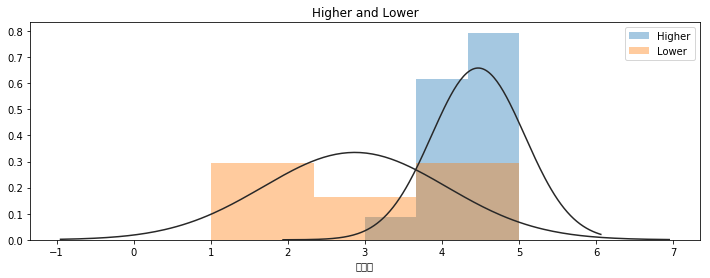

In [42]:
fig = plt.figure(figsize=(12,4))

sns.distplot(wd_s,kde=False,fit=stats.norm,label="Higher")
sns.distplot(we_s,kde=False,fit=stats.norm,label="Lower")
plt.title("Higher and Lower")
plt.legend(loc="best")
plt.show()

In [28]:
wd_s = data[data['주말']>=3]['만족도']
we_s = data[data['주말']<3]['만족도']

In [40]:
ttest = stats.ttest_ind(wd_s,we_s)

In [41]:
print('t검정 통계량 = %.3f, pvalue = %.3f'%(ttest))

t검정 통계량 = 4.951, pvalue = 0.000


In [35]:
d_s=data[data['주중']>2]['만족도']
w_s = data[data['주중']<=2]['만족도']

In [84]:
(texty-temp).mean()

3.144819489721919